## Algebraic analysis for time series prediction

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("../data/PZV.txt", sep=";")
df

,12 Months Ending,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Revenue,"69,6791","96,659232","96,052477","106,471559","115,127431","129,266391","157,852473","192,127846","192,970633","180,278898","179,638265","203,001622","222,74357","219,948158","239,617122","163,79","163,79"
1,- Cost of Revenue,"55,941846","77,793388","80,644981","80,596325","89,253363","102,761819","127,915602","149,792343","162,935001","144,029481","145,024328","164,700823","180,422845","183,588102","202,310299",NaN,NaN
2,Gross Profit,"13,737254","18,865843","15,407497","25,875235","25,874068","26,504571","29,936871","42,335503","30,035632","36,249417","34,613937","38,300799","42,320725","36,360056","37,306823",NaN,NaN
3,+ Other Operating Income,NaN,NaN,"0,121351","0,682634","0,859592","0,257472",NaN,"0,111504","0,124247","0,196073","0,169428","0,488879","0,463682","0,562732","1,217273",NaN,NaN
4,- Operating Expenses,"9,734129","15,110345","18,379286","20,176668","20,718259","20,073852","22,069915","28,258804","29,806244","28,69642","27,532148","28,892493","31,419428","32,876506","31,912361",NaN,NaN
5,Operating Income,"4,003128","3,755503","-2,85044","6,381198","6,015408","6,688195","7,866949","14,188195","0,353626","7,749073","7,251216","9,897185","11,364979","4,046281","6,611735",NaN,NaN
6,- Interest Expense,0,0,"0,799351",0,0,0,"1,512975","2,554159","3,219995",NaN,"0,8845","1,161956","1,123146","1,010484","1,119092",NaN,NaN
7,- Foreign Exchange Losses (Gains),0,0,"-1,537013",0,0,0,"0,034754","0,061979","0,084279",NaN,"0,028962","0,015639","0,017088","0,000869","-0,009268",NaN,NaN
8,- Net Non-Operating Losses (Gains),"0,531742","-0,135253","-0,162766","0,889713","-0,333063","1,358897","-0,429796","-0,27456","-2,056302","2,052537","0,020273","0,032148","0,329008","-0,310183","-0,139307",NaN,NaN
9,Pretax Income,"3,471385","3,890755","-1,950012","5,491485","6,348471","5,329298","6,749015","11,846617","-0,894347","5,696536","6,317481","8,687442","9,895737","3,345111","5,641219",NaN,NaN


In [4]:
df2 = df.loc[[0,4,34,35,42],:].transpose()
df2.columns = df2.iloc[0]
df2 = df2.drop(df2.index[0])

In [5]:
df2

12 Months Ending,Revenue,- Operating Expenses,Sales per Employee,Dividends per Share,Rental Expense
2000,"69,6791","9,734129",NaN,"0,005792",NaN
2001,"96,659232","15,110345","40224,39936",0,NaN
2002,"96,052477","18,379286","30795,92093",0,NaN
2003,"106,471559","20,176668","36588,16471",NaN,NaN
2004,"115,127431","20,718259","39947,06138",NaN,NaN
2005,"129,266391","20,073852","47315,66276",NaN,NaN
2006,"157,852473","22,069915","58312,69795",NaN,NaN
2007,"192,127846","28,258804","71000,68236",NaN,NaN
2008,"192,970633","29,806244","77904,97899","0,065165","0,348703"
2009,"180,278898","28,69642",NaN,NaN,NaN


In [7]:
x = df2.loc[:, ['Revenue']].values.tolist()
x = [float(i[0].replace(',', '.')) for i in x]
n = len(x)
x = np.array(x)

t = (df2.index.values).astype(int)

print(t)
print(x, n)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016]
[ 69.6791    96.659232  96.052477 106.471559 115.127431 129.266391
 157.852473 192.127846 192.970633 180.278898 179.638265 203.001622
 222.74357  219.948158 239.617122 163.79     163.79    ] 17


### Norming the data

In [8]:
x_m = np.mean(x)
x_s = np.std(x)
x_norm0 = (x - x_m)/x_s
print(x_norm0)

[-1.85572319 -1.30462791 -1.31702147 -1.10420165 -0.9273971  -0.63859517
 -0.05469682  0.64541081  0.66262555  0.40338459  0.39029904  0.86751819
  1.27076656  1.21366757  1.61542517  0.06658291  0.06658291]


In [9]:
# Train, test split
n_train = n - 4
n_test = 4
n_extrap = 2

x_train = x_norm0[:n_train]
x_test = x[n_train:]

### Checking the ranks of Hankel matrices

In [10]:
from math import floor
from scipy.linalg import hankel
from scipy.linalg import det
max_hr = floor((n_train + 1)/2)
print("Max rank is:", max_hr)

Max rank is: 7


In [11]:
hrank = -1
hrankd = 99999
for r in range(1, max_hr+1):
    print("================================ "+str(r)+" ===============================")
    n_sub = 2*r-1
    H = hankel(x_train[list(range(n_train-n_sub, n_train-n_sub+r))], x_train[(-r):])
    print(H)
    d = abs(det(H))
    if d < hrankd:
        hrank = r-1
        hrankd = d
    print(r, d)

print("================================ DECISION ===============================")
print("H-rank =", hrank, ".")

================================ 1 ===============================
[[1.27076656]]
1 1.2707665632904772
================================ 2 ===============================
[[0.39029904 0.86751819]
 [0.86751819 1.27076656]]
2 0.25660884128555467
================================ 3 ===============================
[[0.66262555 0.40338459 0.39029904]
 [0.40338459 0.39029904 0.86751819]
 [0.39029904 0.86751819 1.27076656]]
3 0.1631039551865819
================================ 4 ===============================
[[-0.05469682  0.64541081  0.66262555  0.40338459]
 [ 0.64541081  0.66262555  0.40338459  0.39029904]
 [ 0.66262555  0.40338459  0.39029904  0.86751819]
 [ 0.40338459  0.39029904  0.86751819  1.27076656]]
4 0.06645739276008444
================================ 5 ===============================
[[-0.9273971  -0.63859517 -0.05469682  0.64541081  0.66262555]
 [-0.63859517 -0.05469682  0.64541081  0.66262555  0.40338459]
 [-0.05469682  0.64541081  0.66262555  0.40338459  0.39029904]
 [ 0.64541

In [12]:
def cofactor_last_row(H, j, m):
    M = np.delete(H, j, 1)
    M = np.delete(M, m-1, 0)
    return((-1)** (m+j+1) * det(M))

In [86]:
hrank = 6

### Finding the roots of the characteristic equation

In [14]:
def prepareAB(x_train, n_train, hrank, flag_verb=False):
    r = hrank+1
    n_sub = 2*r-1
    H = hankel(x_train[list(range(n_train-n_sub, n_train-n_sub+r))], x_train[(-r):])
    #print(H)
    #print(np.linalg.det(H))

    coeffs = []

    for j in range(r):
        coeff = cofactor_last_row(H, j, r)
        coeffs.append(coeff)
        if flag_verb:
            print("rho^", j, " * ", coeff, end=" + ")
    if flag_verb:
        print(" = 0.")

    coeffs.reverse()
    rhos = np.roots(coeffs)
    if flag_verb:
        print("\nCoefficients:", coeffs)
    if flag_verb:
        print("Roots:", rhos)

    A = [[]]*(r-1)
    for i in range((n_train-r+1), n_train):
        A[i-(n_train-r+1)] = rhos ** i
    B = x_train[-(r-1):]
    
    AB = np.linalg.lstsq(A, B, rcond=None)
    mus = AB[0]
    
    return((A, B, rhos, mus))

In [15]:
A, B, rhos, mus = prepareAB(x_train, n_train, hrank, flag_verb=False)
print(A)
print(B)
print("Rhos:", rhos, "\n", "Mus:", mus)

[array([ 5.36814764e+01+0.j        , -1.05763562e-01-0.10424515j,
       -1.05763562e-01+0.10424515j, -1.32294851e-04+0.j        ]), array([8.35655294e+01+0.j        , 4.01835699e-02-0.11322541j,
       4.01835699e-02+0.11322541j, 4.90459631e-05+0.j        ]), array([ 1.30085798e+02+0.j        ,  9.67533125e-02-0.00932704j,
        9.67533125e-02+0.00932704j, -1.81829186e-05+0.j        ]), array([2.02503532e+02+0.j        , 3.99748249e-02+0.06772224j,
       3.99748249e-02-0.06772224j, 6.74099368e-06+0.j        ])]
[0.40338459 0.39029904 0.86751819 1.27076656]
Rhos: [ 1.55669208+0.j          0.34250434+0.73296504j  0.34250434-0.73296504j
 -0.37073222+0.j        ] 
 Mus: [ 6.01742320e-03+2.84063494e-20j  3.18747281e-01-2.74502015e-01j
  3.18747281e-01+2.74502015e-01j -1.54968338e+03-4.75955335e-14j]


### Computing forecasts

In [17]:
def doForecast(rhos, mus, n_train, n_test, n_extrap, x_s, x_m):
    x_forecast = []
    for i in range(n_train+n_test+n_extrap):
        x_forecast.append(np.real(np.dot(mus, rhos**i)))
    x_forecast = np.array(x_forecast)
    x_forecast = x_forecast * x_s + x_m
    return(np.array(x_forecast))
x_forecast = doForecast(rhos, mus, n_train, n_test, n_extrap, x_s, x_m)
x_forecast

array([-7.56762661e+04,  2.83182022e+04, -1.02658864e+04,  4.00783380e+03,
       -1.28462087e+03,  6.98012774e+02, -2.09198257e+01,  2.45583345e+02,
        1.39962433e+02,  1.80278898e+02,  1.79638265e+02,  2.03001622e+02,
        2.22743570e+02,  2.53876343e+02,  3.03215896e+02,  3.84171896e+02,
        5.11051652e+02,  7.06958755e+02,  1.01007128e+03])

In [19]:
hranks = list(range(2, 7))
x_forecasts = []
MAPEs = []
for hrank in hranks:
    A, B, rhos, mus = prepareAB(x_train, n_train, hrank, flag_verb=False)
    x_forecast = doForecast(rhos, mus, n_train, n_test, n_extrap, x_s, x_m)
    x_forecasts.append(x_forecast)
    i_test = list(range((n-n_test), n))
    MAPE = 100*np.mean(abs((x_forecast[i_test]-x_test)/x_test))
    MAPEs.append(MAPE)
    print("H-rank =", hrank, MAPE)
    #print(x_test, x_forecast[i_test])
    #print("\n")
print(len(x_forecasts))

H-rank = 2 1935.7852905795326
H-rank = 3 141.33040913543292
H-rank = 4 97.13381507766272
H-rank = 5 30.024482698225984
H-rank = 6 28.850771834225718
5


In [20]:
from matplotlib import cm
#from matplotlib.colors import ListedColormap
from numpy.random import rand
newcolors = []
for i in range(len(hranks)):
    newcolors.append((rand(), rand(), rand()))
#newcmp = ListedColormap(newcolors)

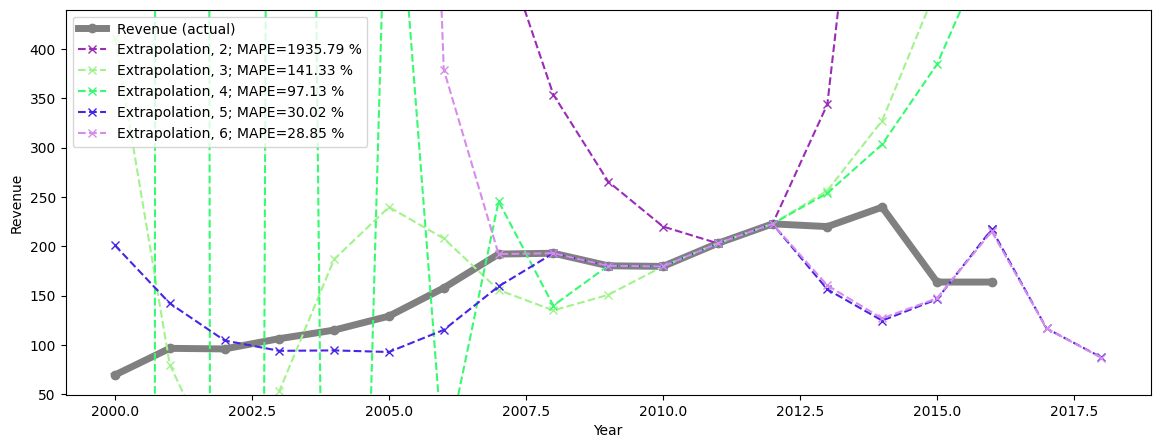

In [21]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(14, 5))
cols = []
plt.plot(t, x, 'o-', color="gray", linewidth=5, label="Revenue (actual)")
for i in range(len(hranks)):
    x_forecast = x_forecasts[i]
    plt.plot(t, x_forecast[:n], 'x--', color=newcolors[i])
    plt.plot(t[-(n_extrap+1):]+(n_extrap), x_forecast[(n-1):], 'x--',\
             color=newcolors[i], label="Extrapolation, "+str(hranks[i])+"; MAPE="+"{:.2f}".format(MAPEs[i])+" %")
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.gca().set(ylim=[min(x)-20, max(x)+200])
plt.legend()
plt.show()

* H-rank might be used as:
    * feature to compare different time series;
    * rank for time series prediction.